In [81]:
import pandas as pd

df_white = pd.read_csv('winequality-red.csv', sep=';')

df_red = pd.read_csv('winequality-white.csv', sep=';')


In [82]:
df = pd.concat([df_white, df_red], ignore_index= True)

In [83]:
df = df.replace({'quality': {3:0,4:0,5:1,6:1,7:1,8:2,9:2}})

df_rabel = df['quality'] # 미리 저장해두자 
df = df.drop('quality', axis= 1)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [84]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df)


In [87]:
from sklearn.cluster import KMeans

In [88]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(df_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(df_scale)

df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(df)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-84.111149,-0.145117
1,-48.779427,5.847319
2,-63.734575,-0.876416
3,-57.481266,-0.345098
4,-84.111149,-0.145117
...,...,...
6492,-24.741512,-0.916209
6493,57.017361,13.706750
6494,-4.896142,0.508568
6495,-8.188532,-8.973281


In [94]:
merged = pd.concat([result, df_cluster], axis =1)

C:\Users\okchr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


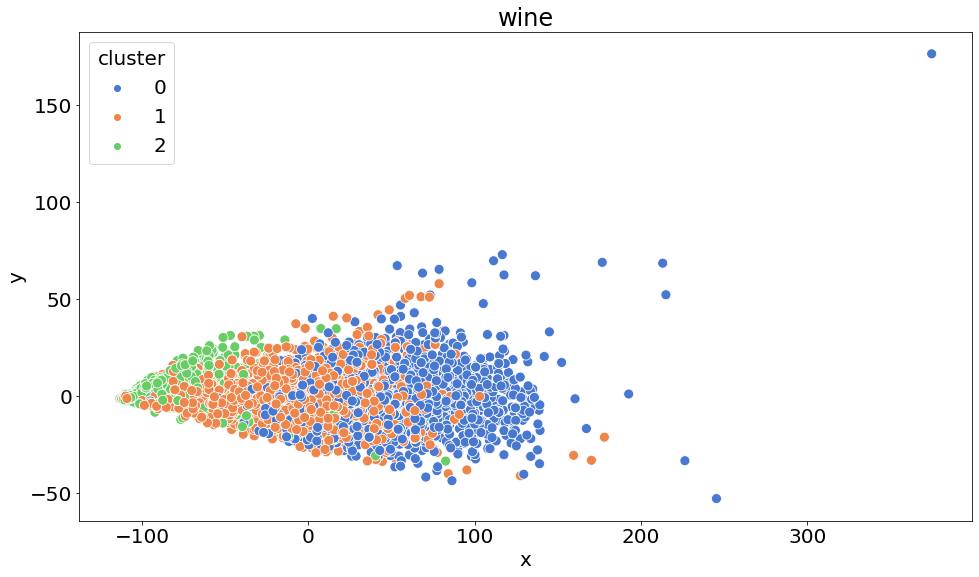

In [96]:
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('wine')
plt.show()

In [97]:
merged_real = pd.concat([result, df_rabel], axis =1)

C:\Users\okchr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


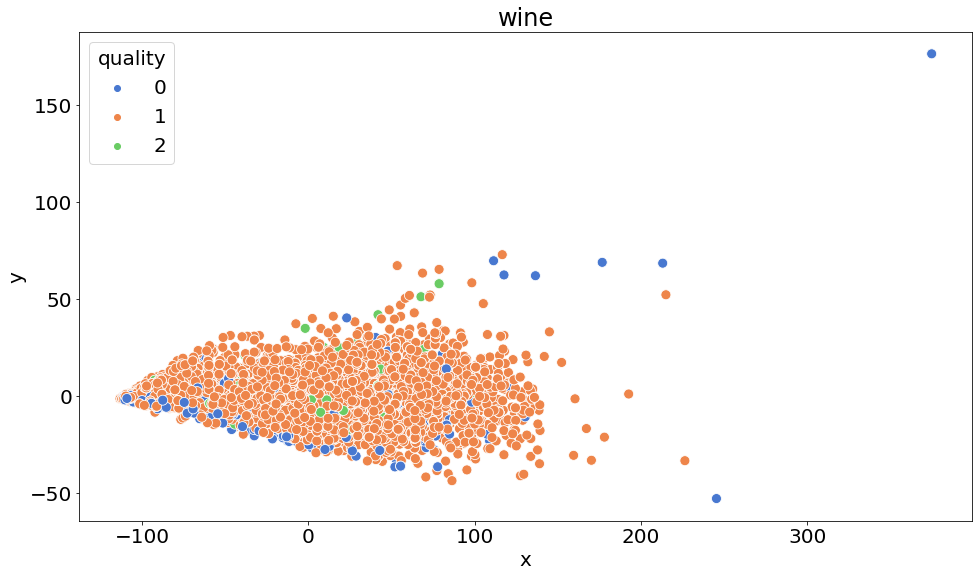

In [100]:
%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged_real['x'], 
                     merged_real['y'], 
                     hue=merged_real['quality'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('wine')
plt.show()